In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import rbf_kernel

In [20]:
dataset = pd.read_csv('Mall_Customers.csv')

In [21]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [22]:
X = dataset.iloc[:, 3:5].values

In [23]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [24]:
# Compute the affinity matrix using the RBF kernel
affinity_matrix = rbf_kernel(X)

In [25]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(3, affinity='precomputed', n_init=100, assign_labels='discretize')
labels_rbf = sc.fit(affinity_matrix)

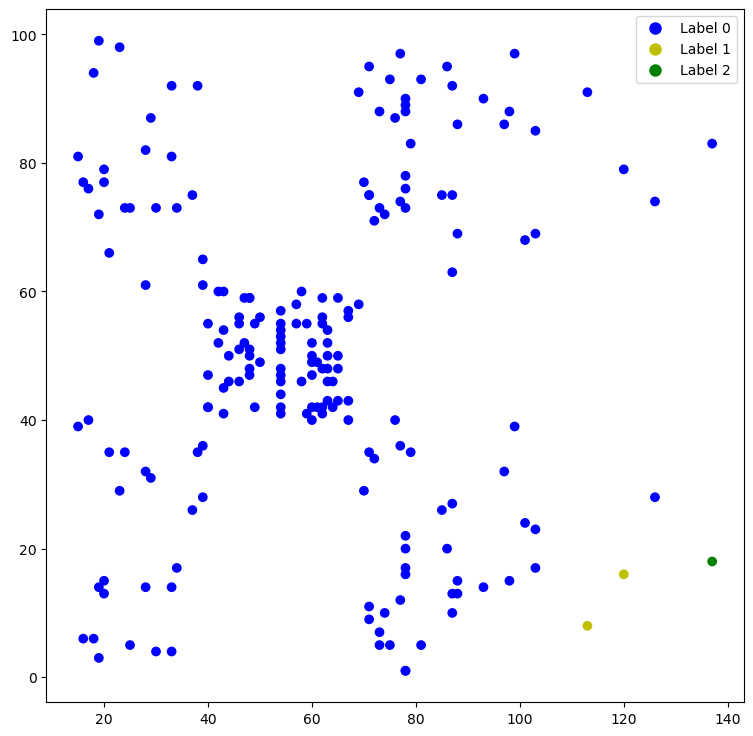

In [18]:
# Compute the affinity matrix using the RBF kernel
affinity_matrix = rbf_kernel(X)

# Creating SpectralClustering model
sc = SpectralClustering(n_clusters=3, affinity='precomputed', n_init=100, assign_labels='discretize')

# Fit and get labels
labels_rbf = sc.fit_predict(affinity_matrix)

# Building the label to colour mapping
colours = {0: 'b', 1: 'y', 2: 'g'}  # Assuming you want three clusters, adjust as needed

# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]

# Plotting the clustered scatter plot
plt.figure(figsize=(9, 9))
plt.scatter(X[:, 0], X[:, 1], c=cvec)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='Label 0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='y', markersize=10, label='Label 1'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10, label='Label 2')])
plt.show()